### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import csv files

In [2]:
calendar = pd.read_csv('./seattle/calendar.csv', index_col='listing_id')
calendar.head()

/Users/rhoesada/opt/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,available,price
listing_id,,,
241032,2016-01-04,t,$85.00
241032,2016-01-05,t,$85.00
241032,2016-01-06,f,NaN
241032,2016-01-07,f,NaN
241032,2016-01-08,f,NaN


In [3]:
listings = pd.read_csv('./seattle/listings.csv', index_col='id')
listings.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews = pd.read_csv('./seattle/reviews.csv', index_col='listing_id')
reviews.head()

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Data exploration

In [5]:
calendar.shape

(1393570, 3)

In [6]:
listings.shape

(3818, 91)

In [7]:
reviews.shape

(84849, 5)

In [8]:
calendar.index.unique()

Int64Index([  241032,   953595,  3308979,  7421966,   278830,  5956968,
             1909058,   856550,  4948745,  2493658,
            ...
             1844791,  6120046,   262764,  8578490,  3383329,  8101950,
             8902327, 10267360,  9604740, 10208623],
           dtype='int64', name='listing_id', length=3818)

In [9]:
listings.index.unique()

Int64Index([  241032,   953595,  3308979,  7421966,   278830,  5956968,
             1909058,   856550,  4948745,  2493658,
            ...
             1844791,  6120046,   262764,  8578490,  3383329,  8101950,
             8902327, 10267360,  9604740, 10208623],
           dtype='int64', name='id', length=3818)

In [10]:
reviews.index.unique()

Int64Index([7202016, 3946674, 7833113, 8308353, 4277026, 7735100, 4701141,
            7934963, 2934389, 6888107,
            ...
            9137899, 6971260, 3258386, 9352778,  830948, 4555997, 3424991,
            1179538, 3624990, 9727246],
           dtype='int64', name='listing_id', length=3191)

### Concat dataframe

In [11]:
all_frames = listings.join([calendar, reviews], how='outer')
all_frames.head(100)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,calculated_host_listings_count,reviews_per_month,date_x,available,price_y,id,date_y,reviewer_id,reviewer_name,comments
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-01-04,f,NaN,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-01-05,f,NaN,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-01-06,f,NaN,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-01-07,f,NaN,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-01-08,f,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-04-08,t,$120.00,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-04-09,t,$120.00,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-04-10,t,$120.00,NaN,NaN,NaN,NaN,NaN
3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,...,4,NaN,2016-04-11,t,$120.00,NaN,NaN,NaN,NaN,NaN


In [12]:
all_frames.shape

(31198740, 99)

In [13]:
all_frames.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square

### Number of reviews and monthly price

In [14]:
listing_average_monthly_price = all_frames['monthly_price'].groupby(all_frames.index).max()
listing_average_monthly_price = listing_average_monthly_price.replace('[\$,)]','', regex=True).astype(float).dropna().sort_values(ascending=False)
listing_average_monthly_price

7733192    19500.0
2459519    19000.0
4464824    14900.0
7439802    14559.0
368403     13500.0
            ...   
7074024      588.0
8566475      550.0
799882       520.0
6717555      500.0
921571       500.0
Name: monthly_price, Length: 1517, dtype: float64

In [15]:
top_reviews_per_month = all_frames['reviews_per_month'].groupby(all_frames.index).count().sort_values(ascending=False)
top_reviews_per_month.head(10)

208356    173010
365550    170090
25002     147460
47196     128845
63308     116800
92835     116435
5682      108405
279063    107310
53867     104755
841049    101835
Name: reviews_per_month, dtype: int64

In [16]:
review_and_price = listing_average_monthly_price.to_frame().join(top_reviews_per_month, how='left')
review_and_price

,monthly_price,reviews_per_month
7733192,19500.0,4380
2459519,19000.0,4745
4464824,14900.0,1825
7439802,14559.0,2555
368403,13500.0,1825
...,...,...
7074024,588.0,1460
8566475,550.0,0
799882,520.0,11680
6717555,500.0,365


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e668590>]],
      dtype=object)

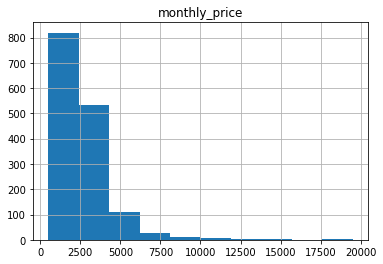

In [17]:
review_and_price.hist('monthly_price', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a77bf50>]],
      dtype=object)

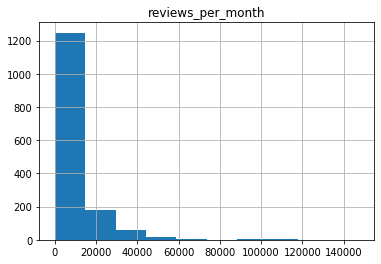

In [18]:
review_and_price.hist('reviews_per_month', bins=10)

In [19]:
review_and_price.corr()

,monthly_price,reviews_per_month
monthly_price,1.000000,-0.027049
reviews_per_month,-0.027049,1.000000


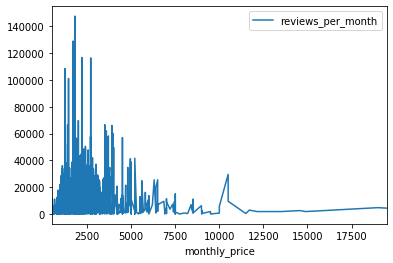

In [20]:
review_and_price.plot(x='monthly_price', y='reviews_per_month')

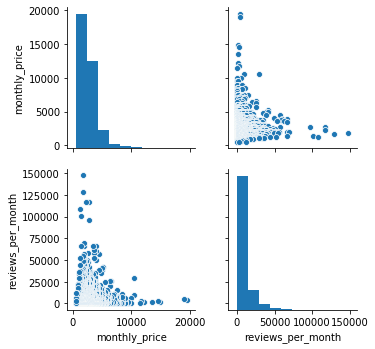

In [21]:
sns.pairplot(review_and_price)

### Neighborhood and price

In [22]:
unique_neighborhood = all_frames['neighbourhood_cleansed'].unique()
unique_neighborhood

array(['Dunlap', 'Roosevelt', 'South Delridge', 'Wallingford', 'Broadway',
       'Georgetown', 'First Hill', 'Fairmount Park', 'Maple Leaf',
       'Green Lake', 'Belltown', 'Adams', 'Holly Park', 'Windermere',
       'Whittier Heights', 'Loyal Heights', 'Fremont', 'Mid-Beacon Hill',
       'Stevens', 'Wedgwood', 'South Lake Union', 'Genesee', 'Ravenna',
       'Greenwood', 'Montlake', 'West Woodland', 'Seward Park',
       'Eastlake', 'Highland Park', 'Leschi', 'Crown Hill',
       'North Admiral', 'Central Business District', 'Phinney Ridge',
       'Haller Lake', 'North Queen Anne', 'Atlantic', 'Alki',
       'Harrison/Denny-Blaine', 'North Beacon Hill', 'Mann', 'Seaview',
       'Matthews Beach', 'Sunset Hill', 'East Queen Anne',
       'Lower Queen Anne', 'Rainier Beach', 'West Queen Anne',
       'Lawton Park', 'Columbia City', 'Gatewood', 'Bryant',
       'International District', 'North Beach/Blue Ridge',
       'North Delridge', 'University District', 'Minor', 'Arbor Heights'

In [29]:
neigborhood_and_price = all_frames[['monthly_price', 'neighbourhood_cleansed']]
neigborhood_and_price['monthly_price'] = neigborhood_and_price['monthly_price'].replace('[\$,)]','', regex=True).astype(float)
neigborhood_and_price.groupby('neighbourhood_cleansed').mean().sort_values(ascending=False, by='monthly_price').dropna()

/Users/rhoesada/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,monthly_price
neighbourhood_cleansed,
Portage Bay,6302.597403
Briarcliff,4604.545455
Pike-Market,4348.207692
South Lake Union,3965.653595
Central Business District,3662.375459
...,...
Georgetown,1400.752137
South Delridge,1390.218659
Wedgwood,1331.795455
